# Law firm

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
graph = Graph_MCMC()
graph.read_from_ns("law_firm")
graph.remove_property("_pos")
graph.remove_property("name")
graph.remove_property("nodeAge")
graph.convert_props_to_flags()

In [4]:
graph.filter_edges("layer", 2) # 1: coworkers, 2: friendship, 3: advice

In [5]:
graph.print_info()

Graph with N=71 nodes, E=575 edges and D=39 vertex features for training


In [6]:
graph.list_props()

name                 (graph)   (type: string, val: law_firm)
description          (graph)   (type: string, val: Multiplex network with 3
                                                   edge types representing
                                                   relationships (coworkers,
                                                   friendship, advice) between
                                                   partners and associates of a
                                                   corporate law firm.  Data
                                                   hosted by Manlio De
                                                   Domenico.[^icon] [^icon]:
                                                   Description obtained from
                                                   the [ICON](https://icon.colo
                                                   rado.edu) project.)
citation             (graph)   (type: string, val: ['Emmanuel Lazega, "The
                        

In [7]:
graph.partition(B_min=5, B_max=5)

Performing inference...
Current bracket: (5, 5, 5) (1178.1917666161623, 1178.1917666161623, 1178.1917666161623)
Current bracket: (5, 5, 5) (1178.1917666161623, 1178.1917666161623, 1178.1917666161623)
Bisect at B = 5 with S = 1178.191766616162
Best result: B = 5, S = 1178.191766616162
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f95b8279700, at 0x7f95b5adcbb0>

In [8]:
graph.mcmc(num_iter=10000)

100%|██████████| 10000/10000 [00:04<00:00, 2318.42it/s]


16.699261144006805

Drawing soft partition


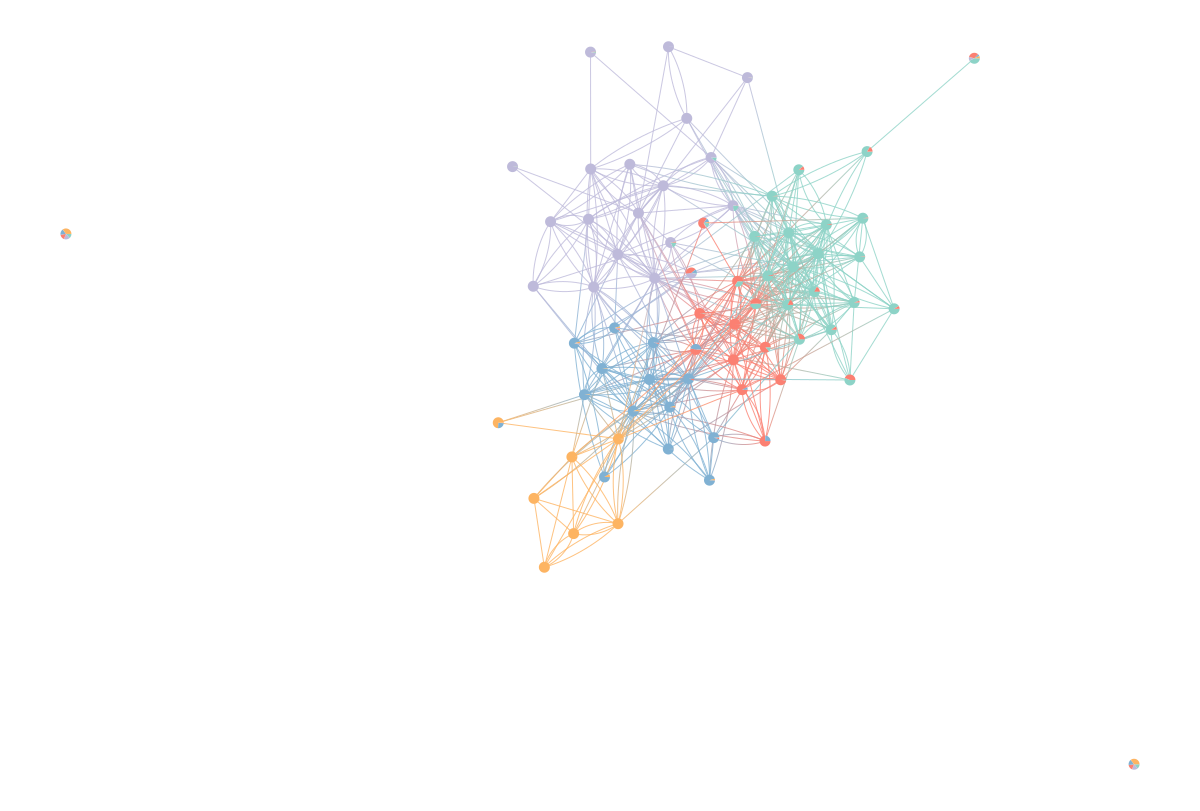

In [9]:
graph.draw()

Drawing block adjacency matrix $e_{rs}$


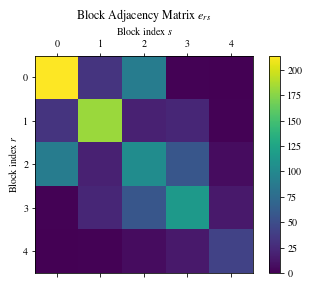

In [10]:
graph.plot_matrix()

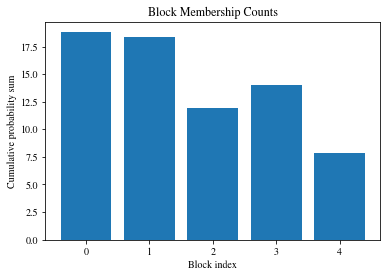

In [11]:
graph.plot_posterior_props()

## Train classifier

In [12]:
classifier = graph.sample_classifier_mala(1000, step_scaling=0.1, verbose=True)

100%|██████████| 1000/1000 [00:00<00:00, 1034.16it/s]Sample accept ratio: 67.5%
Train. set accuracy: 80.28169014084507%



## Interpret results

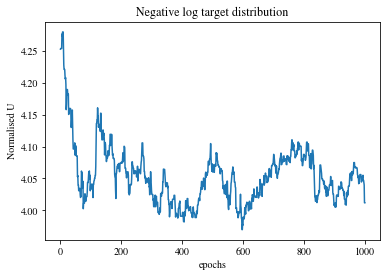

4.054228043185824

In [13]:
classifier.plot_U()

In [14]:
classifier.thin_samples()

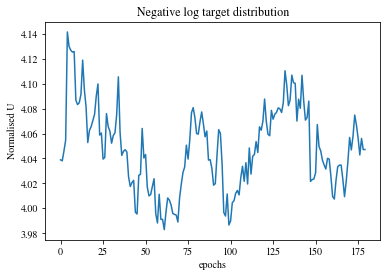

4.048234961414047

In [15]:
classifier.plot_U()

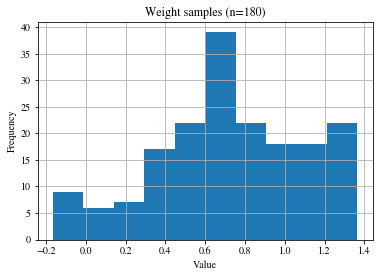

In [16]:
classifier.plot_sample_histogram()

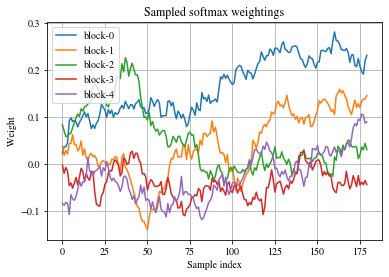

In [17]:
classifier.plot_sample_history()

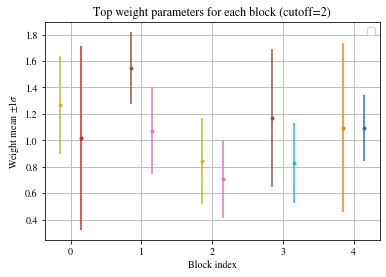

In [18]:
names = graph.get_feature_names()
classifier.plot_block_principal_dims(names, cutoff=2)

Discarding feature 2: nodeGender-1
Discarding feature 3: nodeGender-2
Discarding feature 6: nodeOffice-3
Discarding feature 7: nodeSeniority-1
Discarding feature 8: nodeSeniority-2
Discarding feature 11: nodeSeniority-5
Discarding feature 12: nodeSeniority-6
Discarding feature 14: nodeSeniority-8
Discarding feature 15: nodeSeniority-9
Discarding feature 19: nodeSeniority-15
Discarding feature 21: nodeSeniority-17
Discarding feature 23: nodeSeniority-19
Discarding feature 24: nodeSeniority-20
Discarding feature 25: nodeSeniority-21
Discarding feature 26: nodeSeniority-22
Discarding feature 27: nodeSeniority-23
Discarding feature 28: nodeSeniority-24
Discarding feature 29: nodeSeniority-25
Discarding feature 30: nodeSeniority-28
Discarding feature 31: nodeSeniority-29
Discarding feature 32: nodeSeniority-31
Discarding feature 33: nodeSeniority-32
Discarding feature 34: nodePractice-1
Discarding feature 36: nodeLawSchool-1
Discarding feature 38: nodeLawSchool-3
Discarding feature 39: bias

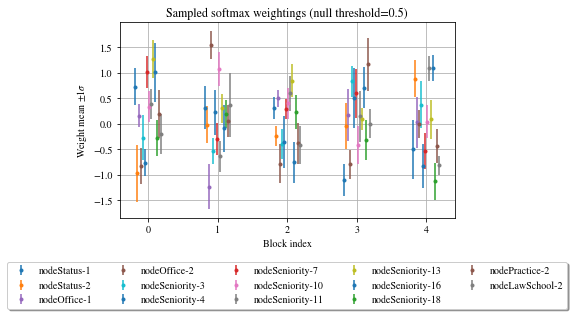

In [19]:
names = graph.get_feature_names()
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0.5, legend=True)